In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

In [3]:
iris_dataset = load_iris()

In [4]:
dir(iris_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [9]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

In [13]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
df['target'] = iris_dataset.target

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
df['flower_name'] = df.target.apply(lambda x:iris_dataset.target_names[x])

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [18]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
df_setosa = df[df.flower_name=='setosa']
df_versicolor = df[df.flower_name=='versicolor']
df_virginica = df[df.flower_name=='virginica']

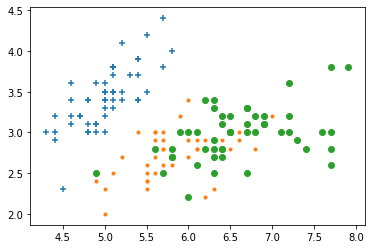

In [29]:
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], marker='+')
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], marker='.')
plt.scatter(df_virginica['sepal length (cm)'], df_virginica['sepal width (cm)'])

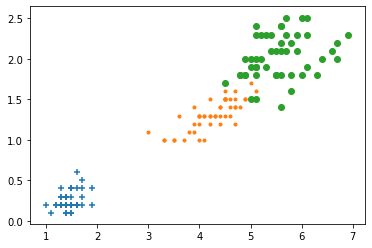

In [30]:
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'],marker='+')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], marker='.')
plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(['target', 'flower_name'], axis='columns')
Y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X ,Y, test_size = 0.2)

In [36]:
from sklearn.svm import SVC

In [39]:
model = SVC(gamma='scale')

In [40]:
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
model.score(x_test, y_test)

0.9